In [1]:
import copy
import seaborn as sns
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score, accuracy_score
from sklearn.utils import resample

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV  

RANDOM_SEED = 8    # Set a random seed for reproducibility!

C:\Users\pgunarathna\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pgunarathna\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pgunarathna\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pgunara

In [2]:
pd.set_option("display.max_columns", 100)

PATH = "Data/"

train_df = pd.read_csv(
    PATH + "train.csv", 
    index_col="PassengerId"
)
test_features_df = pd.read_csv(
    PATH + "test.csv", 
    index_col="PassengerId"
)

labels_df = train_df[['Survived']]
features_df = train_df.drop('Survived', axis=1)

labels_df.head()
features_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
numeric_cols = features_df.columns[features_df.dtypes != 'object']
cat_cols = features_df.columns[features_df.dtypes == 'object']
numeric_cols

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [4]:
def printdata(x):
    print(x.find("Mr"))
    return x

In [64]:
def namePrefix(dataFrame):
    new_df = copy.deepcopy(dataFrame)
    new_df["Name"] = dataFrame["Name"].apply(lambda x : "Mrs" if x.find("Mrs") != -1 else ("Miss" if x.find("Miss") != -1  else "Mr"))
    return new_df

namePrefix(features_df).head()

def nameSplit(cabin):
    if isinstance(cabin, float):
        return cabin
    else:
        return cabin[0]
    
def idSplit(cabin):
    print(cabin)
    if isinstance(cabin, float):
        return cabin
    else:
        if len(cabin) == 2:
            return int(cabin[1])
        return int(cabin[1:len(cabin)-1])

def separateCabin(dataFrame):
    new_df = copy.deepcopy(dataFrame)
    new_df["Cabin_L"] = dataFrame["Cabin"].apply(nameSplit)
    new_df["Cabin_N"] = dataFrame["Cabin"].apply(idSplit)
    return new_df

separateCabin(features_df).head()

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27


ValueError: invalid literal for int() with base 10: '23 C25 C2'

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

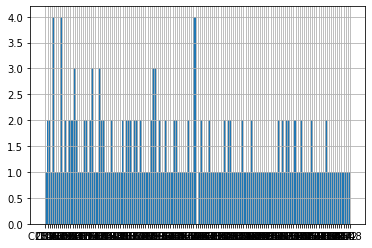

In [65]:
column = "Cabin"
features_df[column].hist(bins=len(features_df[column].unique()))
features_df[column].unique()

In [20]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

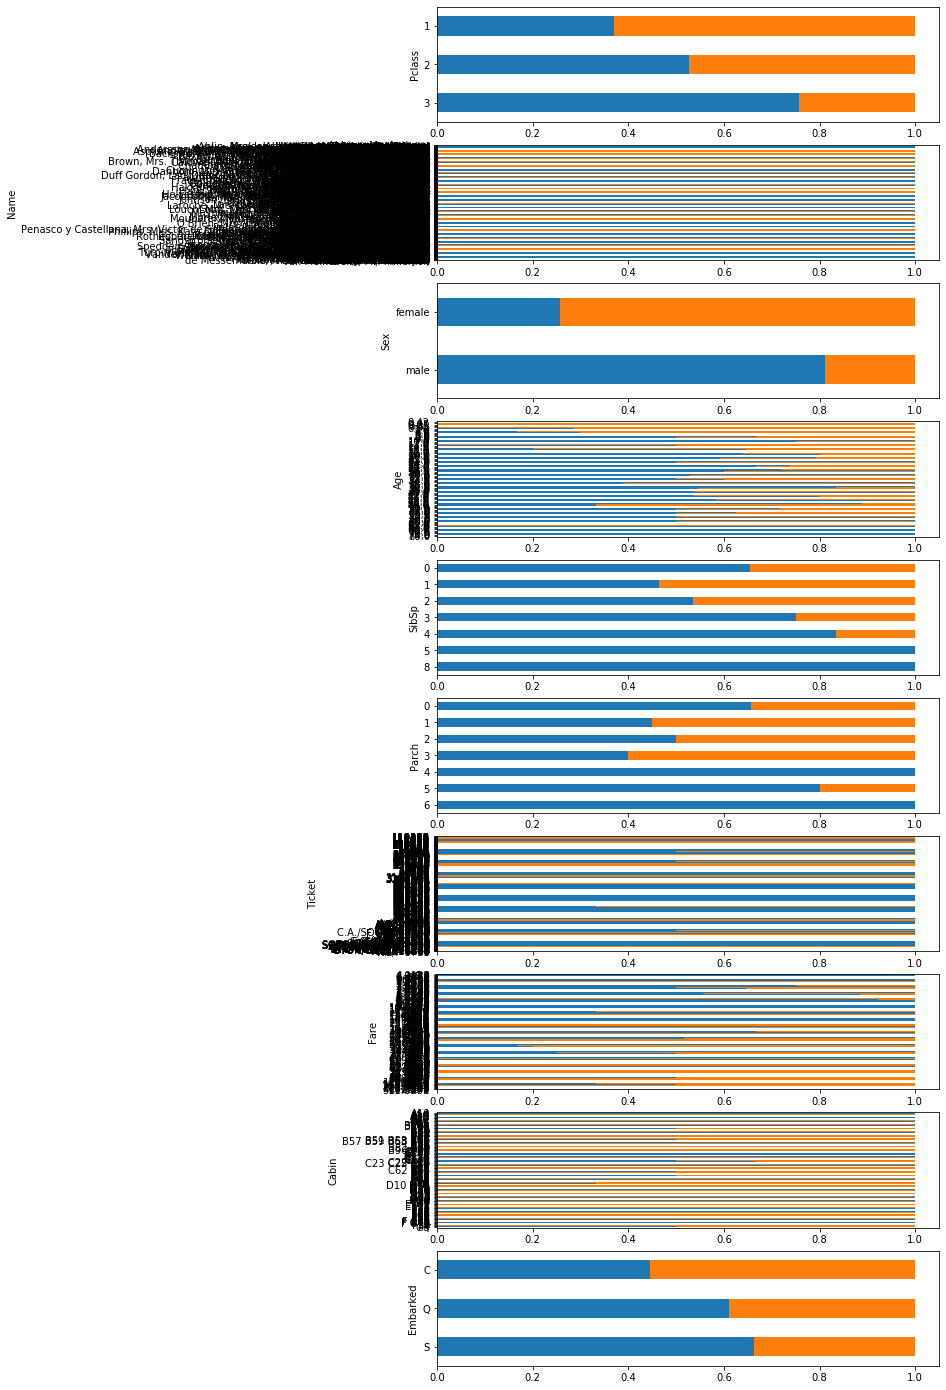

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

joined_df = features_df.join(labels_df)

cols_to_plot = features_df.columns

fig, ax = plt.subplots(
    len(cols_to_plot), 1, figsize=(9,len(cols_to_plot)*2.5)
)

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'Survived', joined_df, ax=ax[idx]
    )

In [4]:
# To compute correlation
im = SimpleImputer(strategy='most_frequent')
le = OrdinalEncoder()
s1 = im.fit_transform(features_df[cat_cols])
encoded = le.fit_transform(s1)

encoded = pd.DataFrame(encoded, columns=cat_cols)

# join all the dataframe to compute correlations
joined_df = features_df[numeric_cols].join(encoded).join(labels_df)
joined_df.head()

,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,22.0,1,0,7.2500,190.0,0.0,596.0,81.0,0.0,0
2,1,38.0,1,0,71.2833,353.0,0.0,669.0,47.0,2.0,1
3,3,26.0,0,0,7.9250,272.0,0.0,49.0,55.0,2.0,1
4,1,35.0,1,0,53.1000,15.0,1.0,472.0,47.0,2.0,1
5,3,35.0,0,0,8.0500,554.0,1.0,275.0,47.0,1.0,0


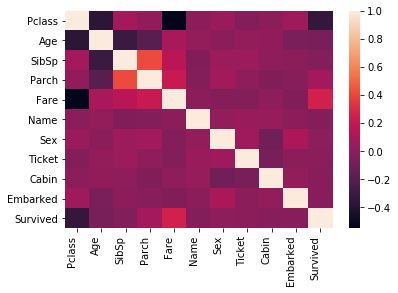

In [5]:

correlations = joined_df.corr()

ax = sns.heatmap(
    correlations
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


In [6]:
est_mlp = MLPClassifier(hidden_layer_sizes=(200,100,), learning_rate='invscaling', learning_rate_init=0.01,
                          power_t=0.5, max_iter=500, shuffle=True, tol=0.0001, 
                          early_stopping=True, validation_fraction=0.1, n_iter_no_change=10, max_fun=15000,
                         random_state=RANDOM_SEED)
est_xgb = XGBClassifier(max_depth=5, min_child_weight=1, gamma=0, reg_lambda=30, reg_alpha=0)
est_gb = GradientBoostingClassifier(random_state=8, n_estimators=250)
est_rn = RandomForestClassifier(max_depth=10, bootstrap=True, n_estimators=200)
est_svc = SVC()
est_nb = GaussianNB()
est_kn = KNeighborsClassifier()

estimators_stacked = [('xbg', est_xgb),
              ('mlp', est_mlp),
              #('gb', est_gb),
              #('rn', est_rn)
             ]

stacked_estimator =  StackingClassifier(estimators=estimators_stacked,
                                    final_estimator=LogisticRegression(),
                                    stack_method='predict_proba'
                                  )

In [21]:
seperate_processing_cols = ['Name', 'Ticket']
cat_cols = [x for x in cat_cols if (x not in seperate_processing_cols)]
numeric_cols = [x for x in numeric_cols if (x not in seperate_processing_cols)]



numeric_preprocessing = Pipeline([
    ('Imputer', SimpleImputer()),
    ('Scaler', StandardScaler())
])

cat_preprocessing = Pipeline([
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('Scaler', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[('Numeric_preprocessing', numeric_preprocessing, numeric_cols),
                  ('Cat_preprocessing', cat_preprocessing, cat_cols)],
    remainder='drop'
)

full_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ("estimator", est_xgb)
])

In [22]:

#splitting the dataset
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)


full_pipeline.fit(X_train, y_train)
print("Training done")

Training done


C:\Users\pgunarathna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pgunarathna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
y_pred_train= full_pipeline.predict(X_train)
y_pred= full_pipeline.predict(X_eval)

In [24]:
accuracy_score(y_train, y_pred_train)

0.8959731543624161

In [26]:
accuracy_score(y_eval, y_pred)

0.8203389830508474

In [17]:
param_opt.best_params_

{'preprocessor__estimator__bootstrap': True,
 'preprocessor__estimator__max_depth': None,
 'preprocessor__estimator__n_estimators': 200}

In [27]:
%%time 

full_pipeline.fit(features_df, labels_df.values.ravel())

None   # So we don't print out the whole pipeline representation

Wall time: 120 ms


In [28]:
test_score = full_pipeline.predict(test_features_df)
test_score

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
test_score.shape

(418,)

In [30]:
y_preds = pd.DataFrame(
    {
        "Survived": test_score,
    },
    index = test_features_df.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (418, 1)


,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [31]:
submission_df = pd.read_csv(PATH + "gender_submission.csv", 
                            index_col="PassengerId")

In [32]:
submission_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [33]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

In [34]:
# Save predictions to submission data frame
submission_df["Survived"] = test_score

submission_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [36]:
submission_df.to_csv('my_submission2.csv', index=True)